In [1]:
from IPython.display import HTML, display

display(HTML("""
<style>
.jp-OutputArea pre {
    max-height: 500px;
    overflow-y: auto;
    border: 1px solid #e0e0e0;
    border-radius: 4px;
}
</style>
"""))

In [27]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

In [28]:
data=pd.read_csv("Boston.csv")
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [30]:
#OLS 显式解
X=np.array(data.drop(["MEDV"],axis=1))
E = np.ones(len(X)) 
X = np.column_stack([E, X])
Y=np.array(data["MEDV"])
beta_hat=np.linalg.inv(X.T@X)@X.T@Y
for i in range(0,14):
    print(f"beta{i}_hat={beta_hat[i]}")

beta0_hat=36.45948838506325
beta1_hat=-0.10801135783678346
beta2_hat=0.046420458366893624
beta3_hat=0.020558626367077268
beta4_hat=2.686733819347391
beta5_hat=-17.76661122829135
beta6_hat=3.809865206810208
beta7_hat=0.0006922246403437068
beta8_hat=-1.4755668455999353
beta9_hat=0.30604947898512713
beta10_hat=-0.012334593916576531
beta11_hat=-0.9527472317067113
beta12_hat=0.00931168327379691
beta13_hat=-0.5247583778554442


In [5]:
#Gradient Descent
def Loss(X,Y,beta_hat):
    n=2*len(Y)
    out=np.sum((Y-X@beta_hat)**2)/n
    return out

In [31]:
temp=[0]*14
print(temp)
alpha=0.000005
stoprule=5
error=1000
iteration=0
while error>stoprule and iteration<=1000000:
    Gradient=X.T@(X@temp-Y)/len(Y)
    temp=temp-alpha*Gradient
    error=Loss(X,Y,temp)
    iteration=iteration+1
    if iteration%1000==0:
        print(f"iteration:{iteration}")
        print(error)
        print(temp)
for i in range(0,14):
  print(f"beta{i}_hat={temp[i]}")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
iteration:1000
33.88512880345555
[ 0.003166   -0.03732959  0.11558784 -0.02312616  0.00197196  0.00108825
  0.03752292  0.0388996   0.00924288 -0.00071875  0.00098158  0.02547862
  0.05201405 -0.10393607]
iteration:2000
31.596363213608683
[ 0.00592006 -0.06393658  0.12999929 -0.03736709  0.00385073  0.00209639
  0.07046772  0.06196565  0.01307542  0.00326989  0.00145319  0.04773709
  0.0486682  -0.19361614]
iteration:3000
29.941811897745847
[ 0.00858799 -0.0830966   0.13073876 -0.04887568  0.00565744  0.00308506
  0.10178272  0.07369074  0.01626201  0.00792936  0.00234265  0.06941777
  0.04688764 -0.27183822]
iteration:4000
28.669677392963422
[ 0.01121625 -0.09651818  0.12902144 -0.05826101  0.00741104  0.0040755
  0.13198937  0.0818853   0.01920719  0.0125409   0.00310878  0.09076664
  0.04554293 -0.33966478]
iteration:5000
27.672121798871963
[ 0.01381255 -0.10560501  0.12699574 -0.06583991  0.00912173  0.00507019
  0.16126696  0.08841804  0.

In [32]:
#Cos
cosine_distance = cosine(beta_hat, temp)
similarity = 1 - cosine_distance

print("Cosine Similarity:", similarity)  

Cosine Similarity: 0.2001909749102394


In [34]:
# 将两个数组合并成 DataFrame
Table = pd.DataFrame({
    'Array1': beta_hat,
    'Array2': temp
})
# 保存到 Excel
Table.to_excel('output.xlsx', index=False)  

In [36]:
#Stardard Data
data=pd.read_csv("Boston.csv")
df=np.array(data)
for i in range(0,13):
    mean=np.mean(df[:,i])
    sd=np.std(df[:,i])
    df[:,i]=(df[:,i]-mean)/sd
print(df.shape)

(506, 14)


In [37]:
#OLS 显式解
X=df[:,0:13]
E = np.ones(len(X)) 
X = np.column_stack([E, X])
Y=df[:,13]
beta_hat=np.linalg.inv(X.T@X)@X.T@Y
for i in range(0,13):
    print(f"beta{i}_hat={beta_hat[i]}")

beta0_hat=22.532806324110673
beta1_hat=-0.9281460643011782
beta2_hat=1.0815686278223962
beta3_hat=0.1408999969042139
beta4_hat=0.6817397247778072
beta5_hat=-2.056718266005202
beta6_hat=2.6742301652393126
beta7_hat=0.019466071657055772
beta8_hat=-3.104044258086474
beta9_hat=2.6622176424734683
beta10_hat=-2.0767816838432385
beta11_hat=-2.060606658906754
beta12_hat=0.8492684177053248


In [38]:
temp=np.array([0]*14)
print(temp)
alpha=0.0005
stoprule=0.1
error=1000
iteration=0
while error>stoprule and iteration<=1000000:
    Gradient=X.T@(X@temp-Y)/len(Y)
    temp=temp-alpha*Gradient
    error=Loss(X,Y,temp)
    iteration=iteration+1
    if iteration%1000==0:
        print(f"iteration:{iteration}")
        print(error)
        print(temp)
for i in range(0,14):
  print(f"beta{i}_hat={temp[i]}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
iteration:1000
109.97337287748607
[ 8.86767726 -0.56373848  0.46639149 -0.60808636  0.55568965 -0.47430635
  1.80790596 -0.36402146 -0.16040347 -0.28996201 -0.56760331 -1.09401317
  0.5496795  -1.64051096]
iteration:2000
47.83510445320012
[14.2455229  -0.59410759  0.45420861 -0.56158614  0.78313402 -0.43778365
  2.56959109 -0.25171965 -0.67036986 -0.02941581 -0.4992441  -1.4365654
  0.66073328 -2.26926082]
iteration:3000
25.054659670458772
[17.50694332 -0.59926012  0.44477335 -0.51321568  0.85881453 -0.46320226
  2.95421001 -0.19081382 -1.03791922  0.18694542 -0.44434    -1.60013754
  0.73317836 -2.65114485]
iteration:4000
16.630326740480395
[19.48484747 -0.60588435  0.45015389 -0.47991016  0.87015542 -0.53081263
  3.14130814 -0.16630884 -1.30733793  0.35457614 -0.41974684 -1.68634131
  0.78733955 -2.90224203]
iteration:5000
13.470852392304277
[20.68435698 -0.61520786  0.46526536 -0.45563233  0.85738818 -0.61656624
  3.22091248 -0.15838455 -1.51657268  0.4

In [39]:
#Cos
cosine_distance = cosine(beta_hat, temp)
similarity = 1 - cosine_distance

print("Cosine Similarity:", similarity)  

Cosine Similarity: 0.9999999999999998


In [40]:
# 将两个数组合并成 DataFrame
Table = pd.DataFrame({
    'Array1': beta_hat,
    'Array2': temp
})

Table.to_excel('output_s.xlsx', index=False)  

In [41]:
def RLoss(X,Y,beta_hat):
    out=np.mean((Y-X@beta_hat)**2)
    return out

28.193564118021293
0.001


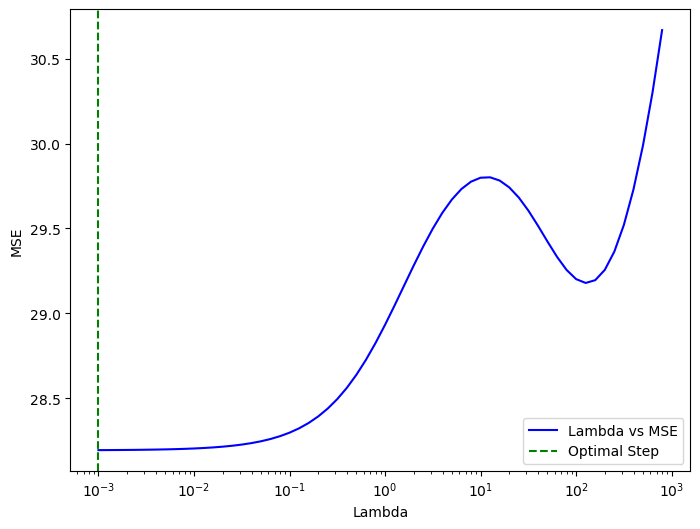

In [42]:
#Ridge Regression  --lambda search -
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
data=pd.read_csv("Boston.csv")
df=np.array(data)
X=df[:,0:13]
E = np.ones(len(X)) 
X = np.column_stack([E, X])
Y=df[:,13]
train_data, test_data = train_test_split(df, test_size=0.2, random_state=123)
train_X=train_data[:,0:13]
E = np.ones(len(train_X)) 
train_X = np.column_stack([E, train_X])
train_Y=train_data[:,13]
Rbeta_hat=[0]*60
MSE=[0]*60
X_test=test_data[:,0:13]
E = np.ones(len(X_test)) 
X_test = np.column_stack([E, X_test])
Y_test=test_data[:,13]
l=[10**(-3+0.1*i) for i in range(0,60)]
I = np.eye(train_X.shape[1])
I[0, 0] = 0 
for i in range(0,60):
  Rbeta_hat=np.linalg.inv(train_X.T@train_X+l[i]*I)@train_X.T@train_Y
  MSE[i]=RLoss(X_test,Y_test,Rbeta_hat)
index=MSE.index(min(MSE))
print(MSE[index])
print(l[index])
figure=plt.figure(figsize=(8, 6))
plt.semilogx(l,MSE,color="blue",label="Lambda vs MSE")
plt.axvline(x=l[index], color='green', linestyle='--',label='Optimal Step')
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.legend()
figure.savefig("Ridge Reg.png")

In [43]:
lam=l[index]
Rbeta_hat=np.linalg.inv(X.T@X+lam*I)@X.T@Y
print(Rbeta_hat)

[ 3.64513232e+01 -1.08005626e-01  4.64220587e-02  2.05100877e-02
  2.68656088e+00 -1.77550976e+01  3.80995606e+00  6.81976275e-04
 -1.47539719e+00  3.06022426e-01 -1.23355051e-02 -9.52619511e-01
  9.31228383e-03 -5.24771088e-01]


28.1924930217535
0.001


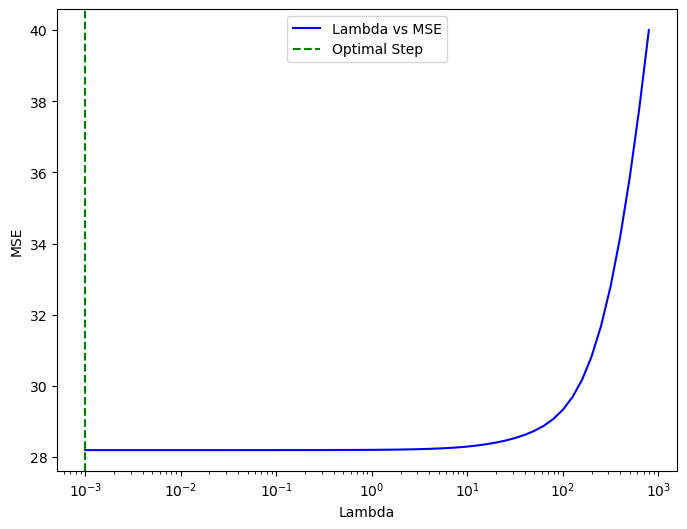

In [44]:
#Ridge Regression  --lambda search --Standard
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
data=pd.read_csv("Boston.csv")
df=np.array(data)
for i in range(0,13):
    mean=np.mean(df[:,i])
    sd=np.std(df[:,i])
    df[:,i]=(df[:,i]-mean)/sd
X=df[:,0:13]
E = np.ones(len(X)) 
X = np.column_stack([E, X])
Y=df[:,13]
train_data, test_data = train_test_split(df, test_size=0.2, random_state=123)
train_X=train_data[:,0:13]
E = np.ones(len(train_X)) 
train_X = np.column_stack([E, train_X])
train_Y=train_data[:,13]
Rbeta_hat=[0]*60
MSE=[0]*60
X_test=test_data[:,0:13]
E = np.ones(len(X_test)) 
X_test = np.column_stack([E, X_test])
Y_test=test_data[:,13]
l=[10**(-3+0.1*i) for i in range(0,60)]
I = np.eye(train_X.shape[1])
I[0, 0] = 0 
for i in range(0,60):
  Rbeta_hat=np.linalg.inv(train_X.T@train_X+l[i]*I)@train_X.T@train_Y
  MSE[i]=RLoss(X_test,Y_test,Rbeta_hat)
index=MSE.index(min(MSE))
print(MSE[index])
print(l[index])
figure=plt.figure(figsize=(8, 6))
plt.semilogx(l,MSE,color="blue",label="Lambda vs MSE")
plt.axvline(x=l[index], color='green', linestyle='--',label='Optimal Step')
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.legend()
figure.savefig("Ridge Reg S.png")

In [45]:
lam=l[index]
Rbeta_hat=np.linalg.inv(X.T@X+lam*I)@X.T@Y
print(Rbeta_hat)

[ 2.25328063e+01 -9.28137599e-01  1.08155318e+00  1.40875707e-01
  6.81743226e-01 -2.05669013e+00  2.67423892e+00  1.94596061e-02
 -3.10401732e+00  2.66214490e+00 -2.07671325e+00 -2.06059831e+00
  8.49268000e-01 -3.74361403e+00]


In [46]:
#Lasso&ADMM
#Initialization
data=pd.read_csv("Boston.csv")
df=np.array(data)
for i in range(0,13):
    mean=np.mean(df[:,i])
    sd=np.std(df[:,i])
    df[:,i]=(df[:,i]-mean)/sd
X=df[:,0:13]
E = np.ones(len(X)) 
X = np.column_stack([E, X])
Y=df[:,13]
train_data, test_data = train_test_split(df, test_size=0.2, random_state=123)
train_X=train_data[:,0:13]
E = np.ones(len(train_X)) 
train_X = np.column_stack([E, train_X])
train_Y=train_data[:,13]
Lbeta_hat=[0]*60
MSE=[0]*60
X_test=test_data[:,0:13]
E = np.ones(len(X_test)) 
X_test = np.column_stack([E, X_test])
Y_test=test_data[:,13]
l=[10**(-3+0.1*i) for i in range(0,60)]
I = np.eye(train_X.shape[1])
I[0, 0] = 0 
#Start
beta1=np.array([0]*14)
z1=np.array([0]*14)
v1=np.array([0]*14)
rho=0.1
MSE=[0]*60
for i in range(0,60):
  iteration=0
  beta2=np.array([10]*14)
  z2=np.array([10]*14)
  v2=np.array([10]*14)
  while np.sqrt(np.sum((beta2-beta1)**2))+np.sqrt(np.sum((z2-z1)**2))>0.001 and iteration<1000:
    beta1=beta2
    z1=z2
    v1=v2
    beta2=np.linalg.inv(2*train_X.T@train_X+rho*I)@(2*train_X.T@train_Y+rho*(z1-v1))
    u=beta2+v1
    for j in range(0,14):
        if u[j]>l[i]/rho:
          z2[j]=u[j]-l[i]/rho
        elif u[j]<-l[i]/rho:
          z2[j]=u[j]+ l[i]/rho
        else:
          z2[j]=0
    v2=v1+beta2-z2
    iteration=iteration+1
    if iteration%10==0:
        print(f"i={i}")
        print(f"iteration:{iteration}")
        print(np.sqrt(np.sum((beta2-beta1)**2))+np.sqrt(np.sum((z2-z1)**2)))
  MSE[i]=RLoss(X_test,Y_test,z2)
print(MSE)

i=0
iteration:10
0.002453969564694055
i=0
iteration:20
0.002114255313955351
i=1
iteration:10
0.002453969564694055
i=1
iteration:20
0.002114255313955351
i=2
iteration:10
0.002453969564694055
i=2
iteration:20
0.002114255313955351
i=3
iteration:10
0.002453969564694055
i=3
iteration:20
0.002114255313955351
i=4
iteration:10
0.0015181378431111524
i=4
iteration:20
0.002165769451668799
i=5
iteration:10
0.0015062261509489296
i=5
iteration:20
0.0021657695491484096
i=6
iteration:10
0.0015062263756185543
i=6
iteration:20
0.002165769524322835
i=7
iteration:10
0.0015062263756185543
i=7
iteration:20
0.002165774018023086
i=8
iteration:10
0.0015062263756185543
i=8
iteration:20
0.00314741777984617
i=9
iteration:10
0.001506226600638338
i=9
iteration:20
0.0031474179420812524
i=9
iteration:30
0.002825626057635725
i=10
iteration:10
0.0015062264290408303
i=10
iteration:20
0.003147418023195945
i=10
iteration:30
0.0019573809149630783
i=11
iteration:10
0.0011530815034381278
i=11
iteration:20
0.00323335466914127

26.973689344350014
1.2589254117941675


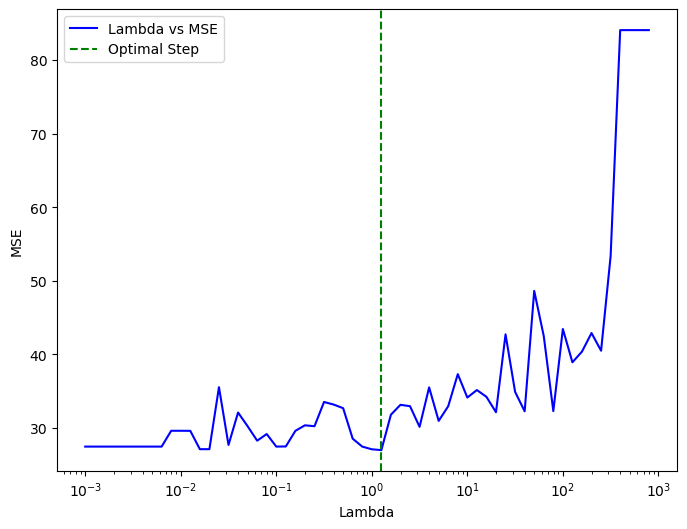

In [47]:
index=MSE.index(min(MSE))
print(MSE[index])
print(l[index])
figure=plt.figure(figsize=(8, 6))
plt.semilogx(l,MSE,color="blue",label="Lambda vs MSE")
plt.axvline(x=l[index], color='green', linestyle='--',label='Optimal Step')
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.legend()
figure.savefig("Lasso S.png")

In [48]:
#Final Lasso
#Start
beta1=np.array([0]*14)
z1=np.array([0]*14)
v1=np.array([0]*14)
rho=0.1
i=index
iteration=0
beta2=np.array([10]*14)
z2=np.array([10]*14)
v2=np.array([10]*14)
while np.sqrt(np.sum((beta2-beta1)**2))+np.sqrt(np.sum((z2-z1)**2))>0.001 and iteration<1000:
    beta1=beta2
    z1=z2
    v1=v2
    beta2=np.linalg.inv(2*train_X.T@train_X+rho*I)@(2*train_X.T@train_Y+rho*(z1-v1))
    u=beta2+v1
    for j in range(0,14):
        if u[j]>l[i]/rho:
          z2[j]=u[j]-l[i]/rho
        elif u[j]<-l[i]/rho:
          z2[j]=u[j]+ l[i]/rho
        else:
          z2[j]=0
    v2=v1+beta2-z2
    iteration=iteration+1
    if iteration%10==0:
        print(f"i={i}")
        print(f"iteration:{iteration}")
        print(np.sqrt(np.sum((beta2-beta1)**2))+np.sqrt(np.sum((z2-z1)**2)))
print(z2)

i=31
iteration:10
0.005957381101664599
i=31
iteration:20
0.0019700056475749554
i=31
iteration:30
0.0020234407458004583
i=31
iteration:40
0.0014459062646790257
i=31
iteration:50
0.002095946679792055
[22  0  1  0  1 -2  3  0 -3  3 -2 -2  1 -4]


In [50]:
#Cos
cosine_distance = cosine(Rbeta_hat, z2)
similarity = 1 - cosine_distance

print("Cosine Similarity:", similarity)  

Cosine Similarity: 0.998703180055668


In [49]:
# 将两个数组合并成 DataFrame
Table = pd.DataFrame({
    'Array1': Rbeta_hat,
    'Array2': z2
})

Table.to_excel('L vs R.xlsx', index=False)  